# 1000_RQ3
## Purpose 
Final analysis of our Reseach Question 3 
## Datasets 
* _Input_: RQ3.csv
* _Output_: N/A

## RQ3: Accuracy of In-Game Attributes
### Are player's attributes a fair indication of their abilities 

* ### Does a players in-game attributes correlate with real-life statistics which back them up 

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
%matplotlib inline 

## Prerequisites:
We define a players:

##### In-Game:
* **Attacking Attributes:** Mean Average of (Mean average of the following, Crossing, Finishing, Heading Accuracy, Short Passing & Volleys)
* **Defending Attributes:** Mean Average of (Marking, Sliding Tackle, Standing Tackle)
* **Goalkeeping Attributes:** Mean Average of (GK Diving, GK Reflexes, GK Handling, GK Kicking & GK Positioning)

##### Real-life:
* **Goalscoring Ability:** Total Goals Scored/ Total appearances (Forwards Only)
* **Ability To Keep Clean Sheet:** Total Clean Sheets/ Total appearances (Goalkeepers Only)
* **Defending Ability:** Total Goals Scored/ Total appearances (Defenders Only)
* **Likelyhood to be cared:** Total Cards Recieved/ Total appearances

### 1. Attacking Attributes vs Goalscoring Abilities

#### Load in the relevant dataframe

In [2]:
RQ3_1 = pd.read_csv(('../../data/analysis/RQ3_1.csv'))
RQ3_1 = RQ3_1.drop('Unnamed: 0', 1)
RQ3_1 = RQ3_1.iloc[1:]

#### Quick glance at the dataframe.

In [3]:
RQ3_1.head(5)

,Players,club,league,overall,age,Position,sho,crossing,finishing,heading_accuracy,short_passing,volleys,composure,preferred_foot,work_rate_att,weak_foot,Attacking Attributes,Total Apps,Total Goals,Average Goals/Game
1,Abel Hernandez,Hull City,English Championship,75.0,26.0,Forward,72.0,46.0,73.0,73.0,67.0,72.0,74.0,Left,Medium,3.0,66.0,63.0,9.0,0.142857
2,Adam Hlousek,Legia Warszawa,Polish Ekstraklasa,71.0,28.0,Forward,59.0,68.0,54.0,66.0,69.0,58.0,65.0,Left,High,2.0,63.0,57.0,3.0,0.052632
3,Adam Le Fondre,Bolton Wanderers,English Championship,68.0,30.0,Forward,70.0,56.0,74.0,61.0,62.0,70.0,72.0,Right,High,3.0,65.0,34.0,12.0,0.352941
4,Adam Szalai,TSG 1899 Hoffenheim,German Bundesliga,75.0,29.0,Forward,74.0,49.0,74.0,83.0,72.0,68.0,75.0,Right,Medium,3.0,69.0,121.0,32.0,0.264463
5,Adama Diakhaby,AS Monaco,French Ligue 1,72.0,20.0,Forward,69.0,68.0,73.0,70.0,74.0,61.0,65.0,Left,High,2.0,69.0,25.0,4.0,0.160000


#### Find the correlation between the two 

In [4]:
RQ3_1['Attacking Attributes'].corr(RQ3_1['Average Goals/Game'])

0.58078546656895313

#### Graph the relationship between the two values

In [5]:
attacking_attributes = RQ3_1.groupby(['Attacking Attributes']).mean()['Average Goals/Game']

In [6]:
attacking_attributes = attacking_attributes.to_frame().reset_index()

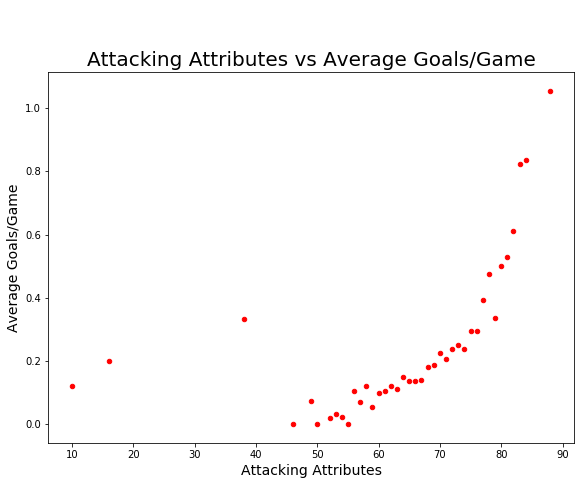

In [7]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Attacking Attributes vs Average Goals/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Goals/Game',size=axis_size)
ax0.set_xlabel('Attacking Attributes',size=axis_size)
attacking_attributes.plot(ax=ax0,kind='scatter',x='Attacking Attributes',y='Average Goals/Game',color=color)

#### Lefty vs Righty

In [8]:
RQ3_1_left = RQ3_1[RQ3_1['preferred_foot']=='Left']

In [9]:
RQ3_1_left = RQ3_1_left.sort_values('Average Goals/Game', ascending=False).reset_index().drop('index',1)
RQ3_1_left.head(5)

,Players,club,league,overall,age,Position,sho,crossing,finishing,heading_accuracy,short_passing,volleys,composure,preferred_foot,work_rate_att,weak_foot,Attacking Attributes,Total Apps,Total Goals,Average Goals/Game
0,Lionel Messi,FC Barcelona,Spanish Primera Division,93.0,30.0,Forward,90.0,77.0,95.0,71.0,88.0,85.0,96.0,Left,Medium,4.0,83.0,168.0,179.0,1.065476
1,Robin van Persie,Fenerbahce SK,Turkish Super Lig,77.0,33.0,Forward,79.0,77.0,76.0,75.0,74.0,81.0,79.0,Left,Medium,3.0,77.0,86.0,48.0,0.558140
2,Antoine Griezmann,Atletico Madrid,Spanish Primera Division,88.0,26.0,Forward,85.0,82.0,88.0,80.0,79.0,87.0,86.0,Left,High,3.0,83.0,111.0,60.0,0.540541
3,Daniel Sturridge,Liverpool,English Premier League,82.0,27.0,Forward,82.0,62.0,83.0,73.0,74.0,75.0,81.0,Left,Medium,2.0,73.0,96.0,47.0,0.489583
4,Romelu Lukaku,Manchester United,English Premier League,86.0,24.0,Forward,85.0,68.0,89.0,87.0,71.0,76.0,84.0,Left,Medium,4.0,78.0,178.0,85.0,0.477528


In [10]:
RQ3_1_right = RQ3_1[RQ3_1['preferred_foot']=='Right']

In [11]:
RQ3_1_right = RQ3_1_right.sort_values('Average Goals/Game', ascending=False).reset_index().drop('index',1)
RQ3_1_right.head(5)

,Players,club,league,overall,age,Position,sho,crossing,finishing,heading_accuracy,short_passing,volleys,composure,preferred_foot,work_rate_att,weak_foot,Attacking Attributes,Total Apps,Total Goals,Average Goals/Game
0,Cristiano Ronaldo,Real Madrid CF,Spanish Primera Division,94.0,32.0,Forward,93.0,85.0,94.0,88.0,83.0,88.0,95.0,Right,High,4.0,88.0,164.0,173.0,1.054878
1,Zlatan Ibrahimovic,Manchester United,English Premier League,88.0,35.0,Forward,88.0,76.0,87.0,80.0,84.0,90.0,91.0,Right,Medium,4.0,83.0,150.0,130.0,0.866667
2,Luis Suarez,FC Barcelona,Spanish Primera Division,92.0,30.0,Forward,90.0,77.0,94.0,77.0,83.0,88.0,83.0,Right,High,4.0,84.0,165.0,138.0,0.836364
3,Robert Lewandowski,FC Bayern Munich,German Bundesliga,91.0,28.0,Forward,88.0,62.0,91.0,85.0,83.0,87.0,87.0,Right,High,4.0,82.0,160.0,121.0,0.756250
4,Edinson Cavani,Paris Saint-Germain,French Ligue 1,87.0,30.0,Forward,83.0,70.0,83.0,88.0,78.0,84.0,83.0,Right,High,3.0,81.0,167.0,116.0,0.694611


In [12]:
leftyrighty = pd.DataFrame(columns = ['Average Goals/Game','Attacking Attributes'])
leftyrighty.set_value('Right Footed','Average Goals/Game', RQ3_1_right.mean()['Average Goals/Game'])
leftyrighty.set_value('Right Footed','Attacking Attributes', RQ3_1_right.mean()['Attacking Attributes'])
leftyrighty.set_value('Left Footed','Average Goals/Game', RQ3_1_left.mean()['Average Goals/Game'])
leftyrighty.set_value('Left Footed','Attacking Attributes', RQ3_1_left.mean()['Attacking Attributes'])

,Average Goals/Game,Attacking Attributes
Right Footed,0.19883,67.5957
Left Footed,0.192372,68.5357


##### Result:
Inconclusive, there is no advantage to being left footed or right footed when it come to goalscoring

### 2. Goalkeeping Attributes vs Ability To Keep Clean Sheets

#### Load in the relevant dataframe

In [13]:
RQ3_3 = pd.read_csv(('../../data/analysis/RQ3_3.csv'))
RQ3_3 = RQ3_3.drop('Unnamed: 0', 1)
RQ3_3 = RQ3_3.iloc[1:]

#### Quick glance at the dataframe.

In [14]:
RQ3_3.head(5)

,Players,club,league,overall,age,Position,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Goalkeeping Attributes,Total Apps,Total Clean Sheets,Average Clean Sheets/Game
1,Adam Federici,Bournemouth,English Premier League,73.0,32.0,Goalkeeper,73.0,69.0,78.0,70.0,73.0,73.0,29.0,4.0,0.137931
2,Alban Lafont,Toulouse FC,French Ligue 1,77.0,18.0,Goalkeeper,78.0,77.0,71.0,76.0,79.0,76.0,60.0,18.0,0.300000
3,Albano Bizzarri,Udinese,Italian Serie A,75.0,39.0,Goalkeeper,74.0,76.0,67.0,79.0,72.0,74.0,97.0,28.0,0.288660
4,Alex Cordaz,Crotone,Italian Serie A,72.0,34.0,Goalkeeper,68.0,70.0,62.0,72.0,74.0,69.0,37.0,4.0,0.108108
5,Alex McCarthy,Southampton,English Premier League,75.0,27.0,Goalkeeper,76.0,73.0,61.0,74.0,78.0,72.0,23.0,2.0,0.086957


#### Find the correlation between the two 

In [15]:
RQ3_3['Goalkeeping Attributes'].corr(RQ3_3['Average Clean Sheets/Game'])

0.59729560498033607

#### Graph the relationship between the two values

In [16]:
goalkeeping_attributes = RQ3_3.groupby(['Goalkeeping Attributes']).mean()['Average Clean Sheets/Game']

In [17]:
goalkeeping_attributes = goalkeeping_attributes.to_frame().reset_index()

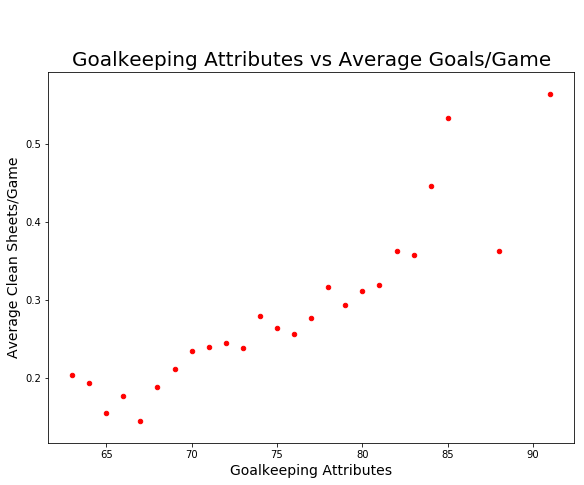

In [18]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Goalkeeping Attributes vs Average Goals/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Goals/Game',size=axis_size)
ax0.set_xlabel('Goalkeeping Attributes',size=axis_size)
goalkeeping_attributes.plot(ax=ax0,kind='scatter',x='Goalkeeping Attributes',y='Average Clean Sheets/Game',color=color)

### 3. Defending Attributes vs Ability to Keep Clean Sheets

#### Load in the relevant dataframe

In [19]:
RQ3_4 = pd.read_csv(('../../data/analysis/RQ3_4.csv'))
RQ3_4 = RQ3_4 .drop('Unnamed: 0', 1)
RQ3_4 = RQ3_4 .iloc[1:]

#### Quick glance at the dataframe.

In [20]:
RQ3_4.head(5)

,Players,club,league,overall,age,Position,Defending Attributes,def,marking,standing_tackle,sliding_tackle,work_rate_def,Total Apps,Total Cards,Average Clean Sheets/Game
1,Aaron Cresswell,West Ham United,English Premier League,76.0,27.0,Defender,76.0,73.0,76.0,75.0,77.0,Medium,101.0,9.0,0.267327
2,Aaron Hughes,Heart of Midlothian,Scottish Premiership,71.0,37.0,Defender,73.0,72.0,75.0,73.0,71.0,Medium,37.0,3.0,0.162162
3,Adam Bodzek,Fortuna Dusseldorf,German 2. Bundesliga,69.0,31.0,Defender,69.0,69.0,64.0,74.0,70.0,High,29.0,9.0,0.241379
4,Adam Lang,Dijon FCO,French Ligue 1,69.0,24.0,Defender,70.0,71.0,72.0,71.0,67.0,Medium,19.0,4.0,0.315789
5,Adam Masina,Bologna,Italian Serie A,74.0,23.0,Defender,71.0,71.0,66.0,74.0,74.0,Medium,65.0,16.0,0.276923


#### Find the correlation between the two 

In [21]:
RQ3_4['Defending Attributes'].corr(RQ3_4['Average Clean Sheets/Game'])

0.37472171311726382

#### Graph the relationship between the two values

In [22]:
defending_attributes = RQ3_4.groupby(['Defending Attributes']).mean()['Average Clean Sheets/Game']

In [23]:
defending_attributes = defending_attributes.to_frame().reset_index()

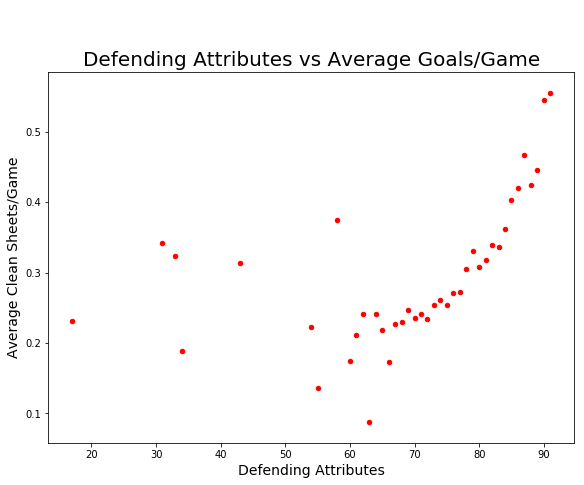

In [24]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))
gs = gridspec.GridSpec(2,6)

ax0 = plt.subplot(gs[0,0:2],title='\n \n'+ 'Defending Attributes vs Average Goals/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Goals/Game',size=axis_size)
ax0.set_xlabel('Defending Attributes',size=axis_size)
defending_attributes.plot(ax=ax0,kind='scatter',x='Defending Attributes',y='Average Clean Sheets/Game',color=color)

### 3. Mental Attributes (eg. Agression) vs Likelyhood to be Carded

#### Load in the relevant dataframe

In [25]:
RQ3_5 = pd.read_csv(('../../data/analysis/RQ3_5.csv'))
RQ3_5 = RQ3_5 .drop('Unnamed: 0', 1)
RQ3_5 = RQ3_5 .iloc[1:]

#### Quick glance at the dataframe.

In [26]:
RQ3_5.head(5)

,Players,club,league,overall,age,Position,aggression,work_rate_def,Total Apps,Total Cards,Average Cards/Game
1,Aaron Cresswell,West Ham United,English Premier League,76.0,27.0,Defender,68.0,Medium,101.0,9.0,0.089109
2,Aaron Hughes,Heart of Midlothian,Scottish Premiership,71.0,37.0,Defender,66.0,Medium,37.0,3.0,0.081081
3,Aaron Hunt,Hamburger SV,German Bundesliga,76.0,30.0,Midfielder,59.0,Medium,118.0,11.0,0.093220
4,Aaron Lennon,Everton,English Premier League,77.0,30.0,Midfielder,57.0,Medium,120.0,6.0,0.050000
5,Aaron Niguez,Real Oviedo,Spanish Segunda Division,73.0,28.0,Midfielder,55.0,Low,43.0,10.0,0.232558


#### Find the correlation between the two 

In [27]:
RQ3_5['aggression'].corr(RQ3_5['Average Cards/Game'])

0.40397523547222858

In [28]:
aggression = RQ3_5.groupby(['aggression']).mean()['Average Cards/Game'].to_frame().reset_index()

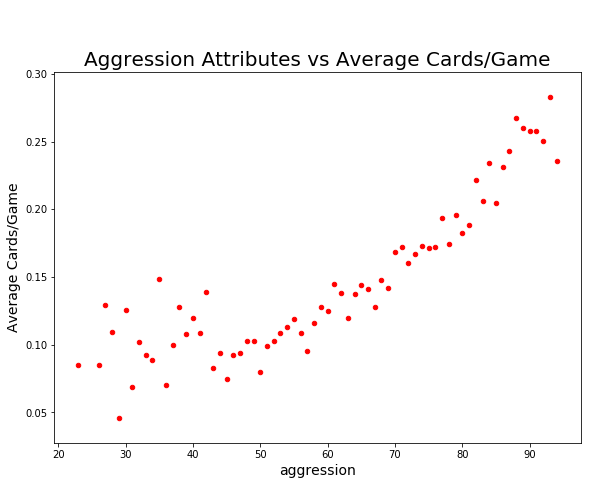

In [29]:
axis_size=14
color = ['r']

fig = plt.figure(figsize=(30,15))

gs = gridspec.GridSpec(2,6)
ax0 = plt.subplot(gs[0,2:4],title='\n \n'+ 'Aggression Attributes vs Average Cards/Game')
ax0.title.set_fontsize(20)
ax0.set_ylabel('Average Cards/Game',size=axis_size)
ax0.set_xlabel('Aggression Attribute',size=axis_size)
aggression.plot(ax=ax0,x='aggression',y='Average Cards/Game',kind='scatter',color=color)


#### Examine the defensive workrate of the most aggressive forwards (both in-game and real-life)

In [30]:
forwards = RQ3_5[RQ3_5['Position'] == 'Forward']
forwards1 = forwards.sort_values('Average Cards/Game', ascending=False).reset_index().drop('index',1).head(50)
workrate1 = forwards.work_rate_def.value_counts()

Text(0,0.5,'')

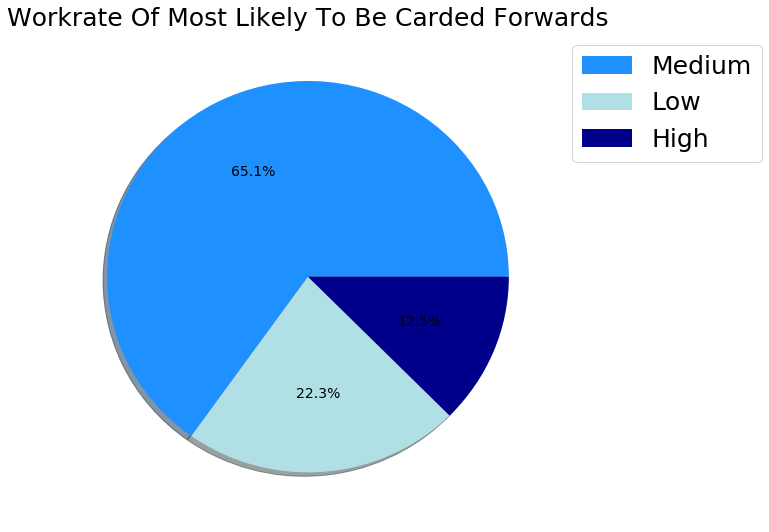

In [31]:
labels = ['','','']
workrate1.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,autopct='%1.1f%%',shadow=True,colors=['dodgerblue','powderblue','darkblue'],labels = labels )
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=workrate1.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Workrate Of Most Likely To Be Carded Forwards',fontsize=25,color='Black')
plt.ylabel('')

In [32]:
forwards2 = forwards.sort_values('aggression', ascending=False).reset_index().drop('index',1).head(50)
workrate2 = forwards2.work_rate_def.value_counts()

Text(0,0.5,'')

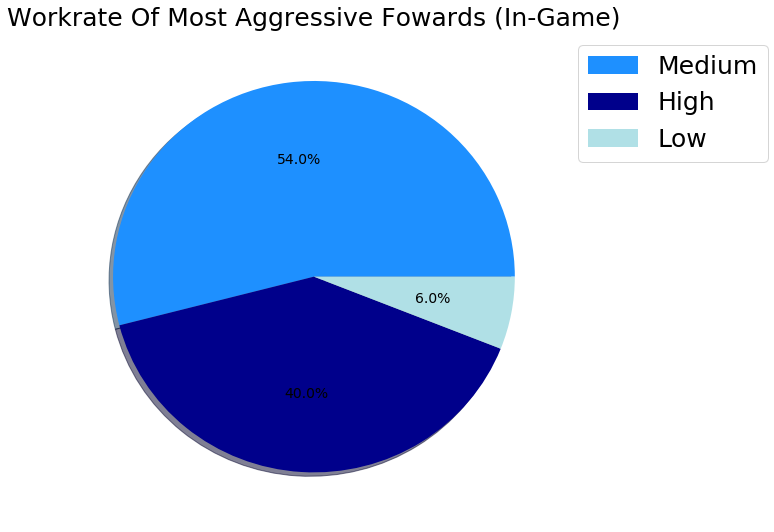

In [33]:
labels = ['','','']
workrate2.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,autopct='%1.1f%%',shadow=True,colors=['dodgerblue','darkblue','powderblue'],labels=labels)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=workrate2.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Workrate Of Most Aggressive Fowards (In-Game)',fontsize=25,color='Black')
plt.ylabel('')

##### Result:
From the pie charts we can see that the most aggressive players in real-life have a low/medium defensive workrate (87.3%). But this is not portrayed directly into the game as the most aggressive players in the game have a high/medium defensive workrate (94%).